### Import Libraries

In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


### Load Data

In [59]:
#reading data
data = pd.read_csv('/Users/abhi/Desktop/MSU/8. Coursework/3. Fall Semester/CSE801B_Data Mining/Project/DataMining/groceries - groceries.csv')
print(f'Shape of data: {data.shape[0]} rows and {data.shape[1]} columns')

Shape of data: 9835 rows and 33 columns


In [60]:
data.head()

Item(s)            Item 1               Item 2          Item 3  \
0        4      citrus fruit  semi-finished bread       margarine   
1        3    tropical fruit               yogurt          coffee   
2        1        whole milk                  NaN             NaN   
3        4         pip fruit               yogurt    cream cheese   
4        4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9  ... Item 23  \
0               ready soups    NaN    NaN    NaN    NaN    NaN  ...     NaN   
1                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
2                       NaN    NaN    NaN    NaN    NaN    NaN  ...     NaN   
3              meat spreads    NaN    NaN    NaN    NaN    NaN  ...     NaN   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN  ...     NaN   

  Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31 Item 32  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 33 columns]

In [63]:
grocery_df = data.drop("Item(s)", axis=1)
grocery_df.head()

Item 1               Item 2          Item 3  \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt    cream cheese   
4  other vegetables           whole milk  condensed milk   

                     Item 4 Item 5 Item 6 Item 7 Item 8 Item 9 Item 10  ...  \
0               ready soups    NaN    NaN    NaN    NaN    NaN     NaN  ...   
1                       NaN    NaN    NaN    NaN    NaN    NaN     NaN  ...   
2                       NaN    NaN    NaN    NaN    NaN    NaN     NaN  ...   
3              meat spreads    NaN    NaN    NaN    NaN    NaN     NaN  ...   
4  long life bakery product    NaN    NaN    NaN    NaN    NaN     NaN  ...   

  Item 23 Item 24 Item 25 Item 26 Item 27 Item 28 Item 29 Item 30 Item 31  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  Item 32  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 32 columns]

### Exploratory Data Analysis

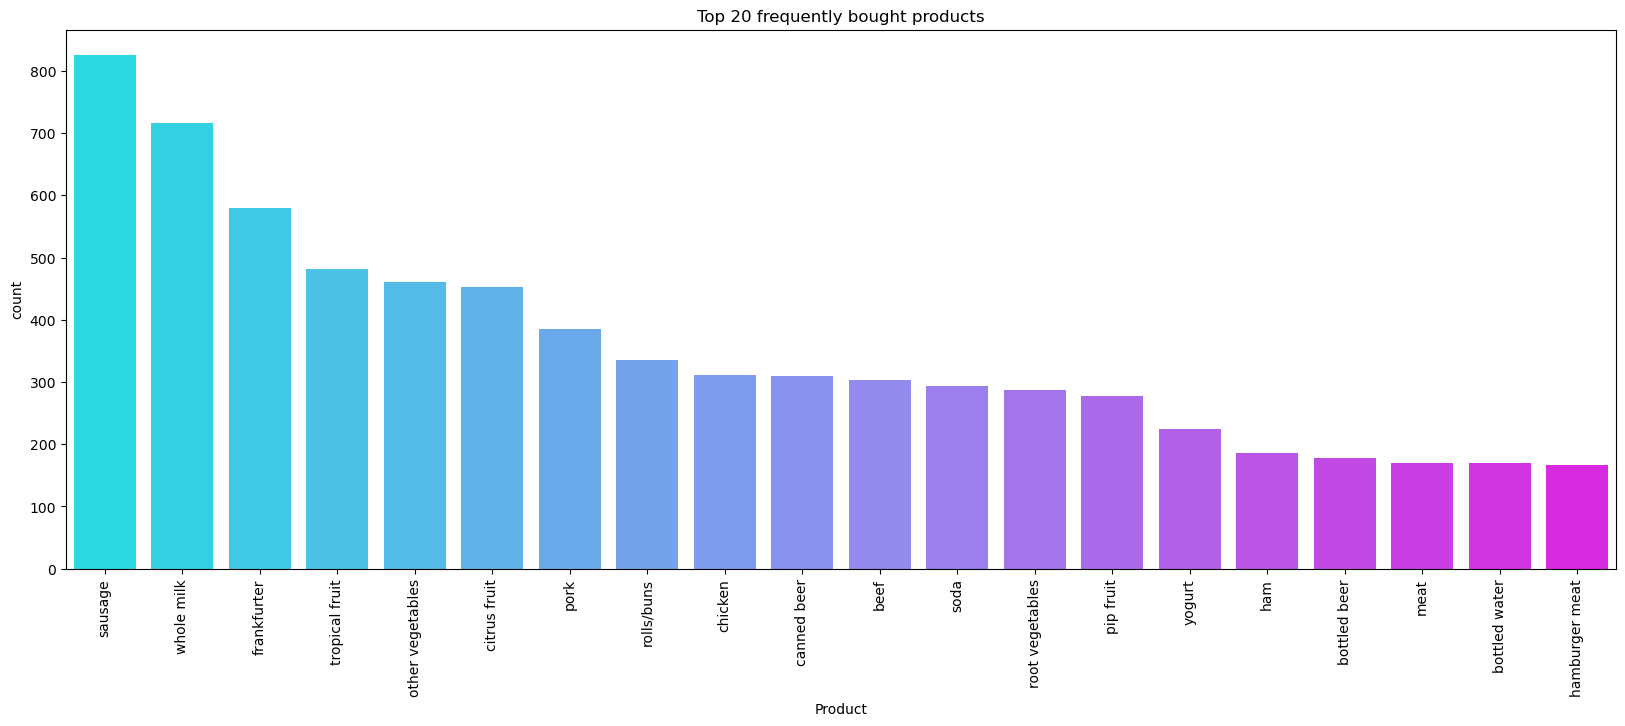

In [64]:
#Top 20 frequently buying items by customer
plt.rcParams['figure.figsize']=20,7
sns.countplot(data=data, x=data['Item 1'],
             order = data['Item 1'].value_counts().head(20).index,
             palette='cool')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.title('Top 20 frequently bought products')
plt.show()

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 in

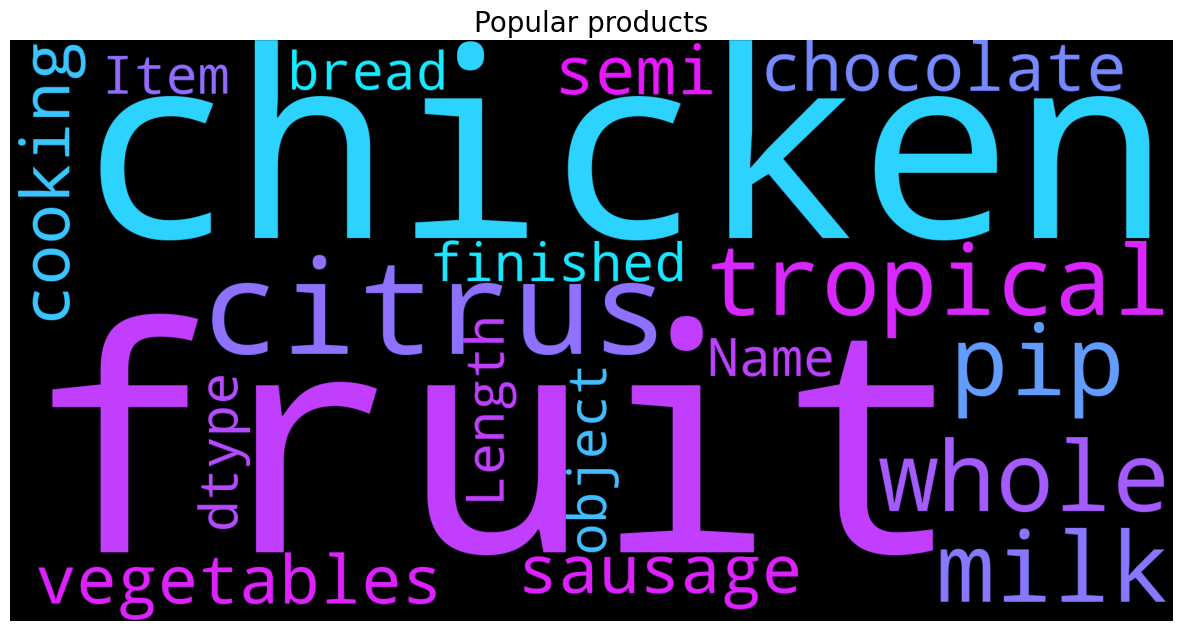

In [65]:
#let's check popular products
from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(width = 2000,  height = 1000, max_words = 20, colormap='cool').generate(str(data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Popular products',fontsize = 20)
plt.show()

In [66]:
#let's create a list of list of transaction
text = grocery_df.values.astype(str).tolist()
text = [[item for item in row if (str(item) != 'nan')&(item!='')] for row in text]
records = []
for item in text:
    item.sort()
    records.append(item)
    
records[:6]

[['citrus fruit', 'margarine', 'ready soups', 'semi-finished bread'],
 ['coffee', 'tropical fruit', 'yogurt'],
 ['whole milk'],
 ['cream cheese', 'meat spreads', 'pip fruit', 'yogurt'],
 ['condensed milk',
  'long life bakery product',
  'other vegetables',
  'whole milk'],
 ['abrasive cleaner', 'butter', 'rice', 'whole milk', 'yogurt']]

In [72]:
text_sorted_filter_length = []

for item in records:
    if len(item) > 2:
        text_sorted_filter_length.append(item)

text_sorted_filter_length.sort(key=len)
text_sorted_filter_length[:6]

[['coffee', 'tropical fruit', 'yogurt'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['beef', 'detergent', 'grapes'],
 ['citrus fruit', 'newspapers', 'zwieback'],
 ['brown bread', 'canned beer', 'packaged fruit/vegetables'],
 ['pastry', 'rolls/buns', 'sugar']]

In [73]:
len(text_sorted_filter_length)

6033

There are more than 6000 combinations for 3 or more items purchased.

In [67]:
#Let's analyze the no. of items wrt each transaction
counts = [len(record) for record in records]
print(f'50 percent of the transactions are having items below or equal to {np.quantile(counts, .5)} only')
print(f'Particular transaction having a maximum of {np.quantile(counts, 1)} items in it')

50 percent of the transactions are having items below or equal to 3.0 only
Particular transaction having a maximum of 32 items in it


In [74]:
df_plot = pd.DataFrame(pd.Series(text_sorted_filter_length).value_counts()).reset_index()
df_plot

index   0
0                           [rolls/buns, sausage, soda]  10
1                [bottled beer, liquor, red/blush wine]   5
2                     [rolls/buns, sausage, whole milk]   4
3          [bottled beer, liquor, red/blush wine, soda]   4
4                            [pastry, rolls/buns, soda]   4
...                                                 ...  ..
5916  [margarine, other vegetables, photo/film, pip ...   1
5917       [berries, sugar, whipped/sour cream, yogurt]   1
5918            [beef, butter milk, citrus fruit, curd]   1
5919  [frozen meals, pip fruit, softener, tropical f...   1
5920  [beef, beverages, butter, candles, chicken, ci...   1

[5921 rows x 2 columns]

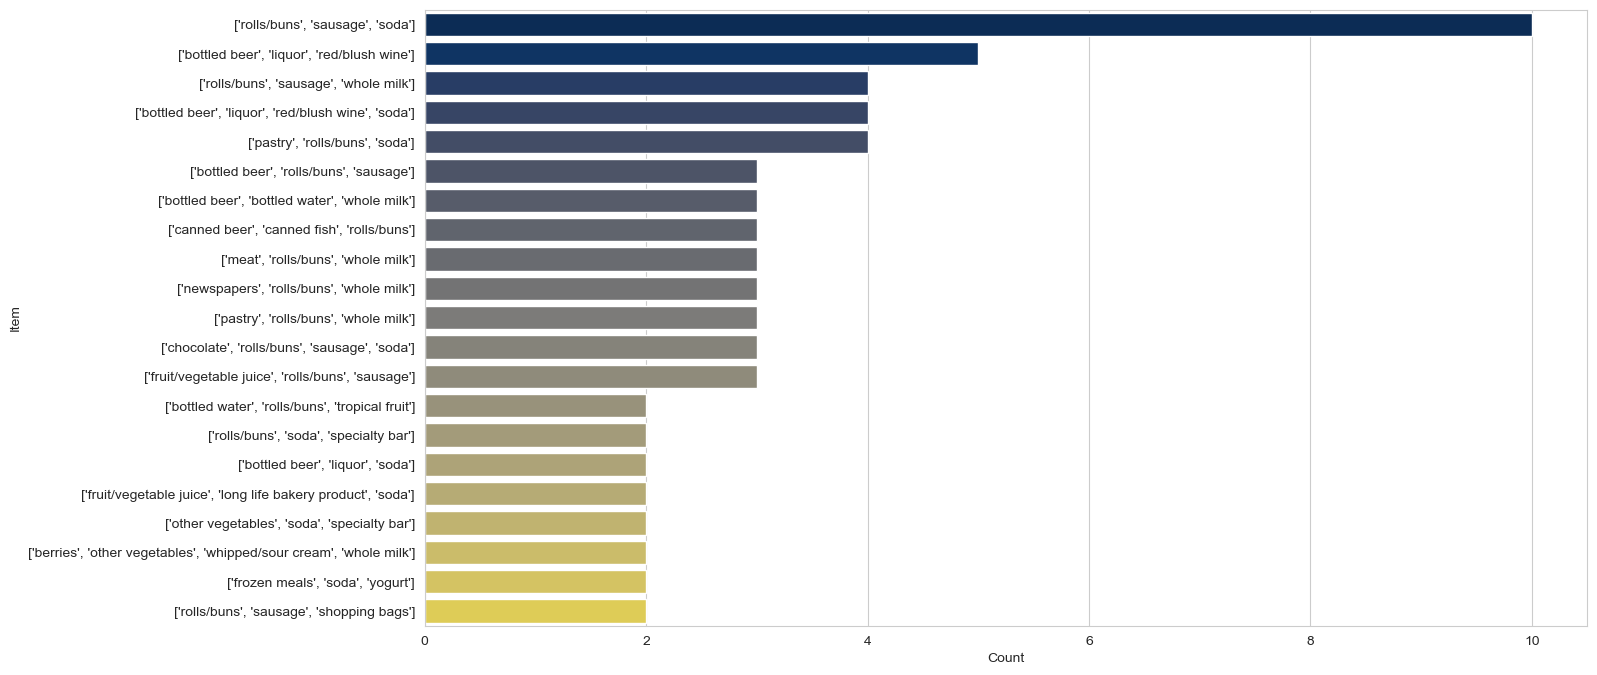

In [75]:
df_plot.columns = ['Item','Count']
df_plot['Item'] = df_plot['Item'].astype(str)
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.barplot(y='Item', x='Count', data=df_plot[:21], palette='cividis');

The figure above shows that there are not many combinations duplicated.

In [76]:
df_plot.astype(str).head()

Item Count
0                  ['rolls/buns', 'sausage', 'soda']    10
1       ['bottled beer', 'liquor', 'red/blush wine']     5
2            ['rolls/buns', 'sausage', 'whole milk']     4
3  ['bottled beer', 'liquor', 'red/blush wine', '...     4
4                   ['pastry', 'rolls/buns', 'soda']     4

In [77]:
text = [item for sublist in text for item in sublist]
text = [w.replace(' ', '_') for w in text]
text = [w.replace('/', '_') for w in text]
text.sort()
text[:10]

['Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products',
 'Instant_food_products']

In [78]:
pd.Series(text).value_counts()

whole_milk               2513
other_vegetables         1903
rolls_buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen_utensil             4
preservation_products       2
baby_food                   1
sound_storage_medium        1
Length: 169, dtype: int64

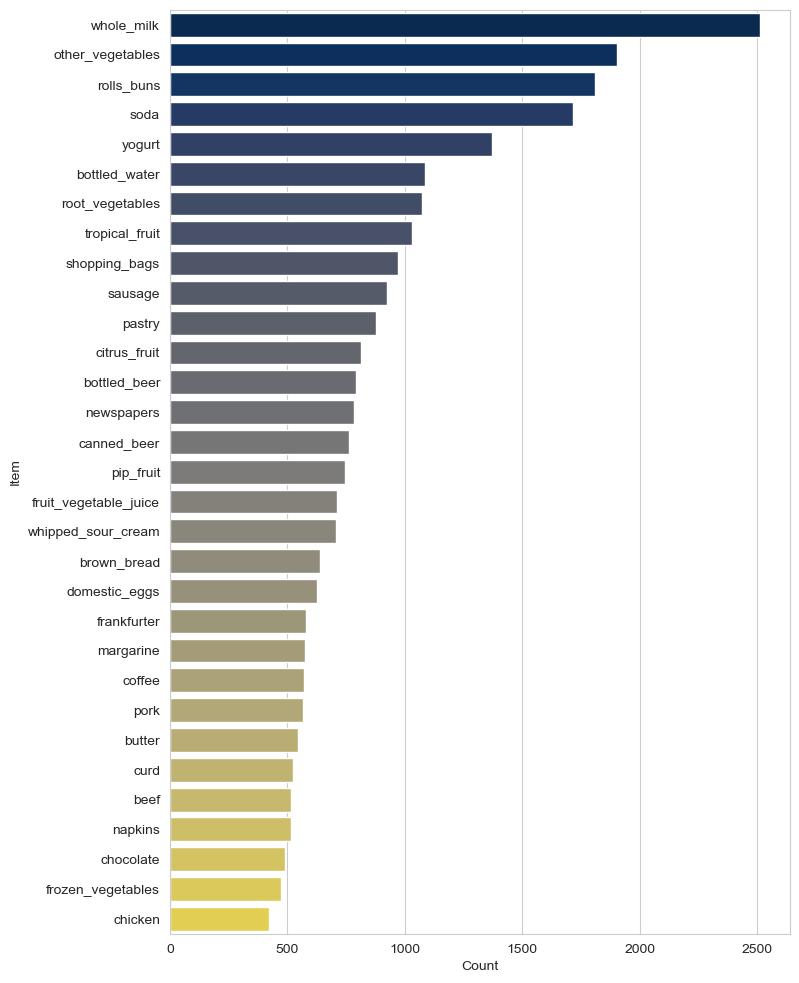

In [79]:
df_plot = pd.DataFrame(pd.Series(text).value_counts()).reset_index()
df_plot.columns = ['Item','Count']
sns.set_style('whitegrid')
plt.figure(figsize=(8,12))
sns.barplot(y='Item', x='Count', data=df_plot[:31], palette='cividis');

The figure above shows the most occuring items throughout all purchases

There are 43,367 items


/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Us

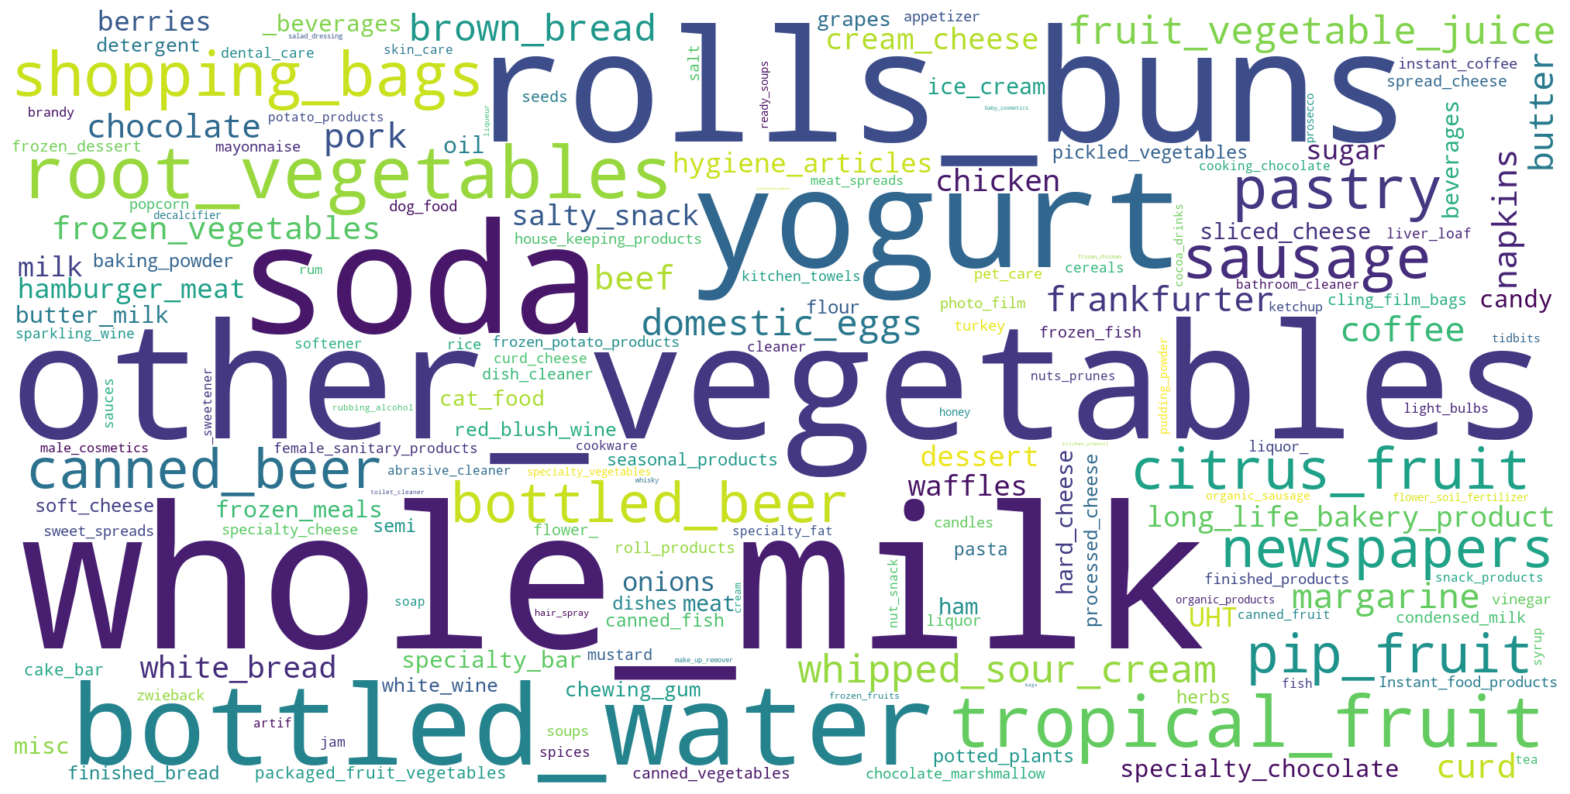

In [80]:
nr_words = '{:,}'.format(len(text))
print ("There are",nr_words,"items",)

wordcloud = WordCloud( background_color="white",width=2000, height=1000,max_words=500,collocations=False).generate(" ".join(text))
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [68]:
# Item Frequency Analysis for Standalone Purchases
transaction_items = data.columns[1:33]

standalone_purchases = data[data["Item(s)"] == 1][transaction_items]

standalone_items = standalone_purchases.stack().value_counts()
top_standalone_items = standalone_items.head(5)
top_standalone_items

canned beer     260
soda            156
whole milk      121
bottled beer    120
rolls/buns      109
dtype: int64

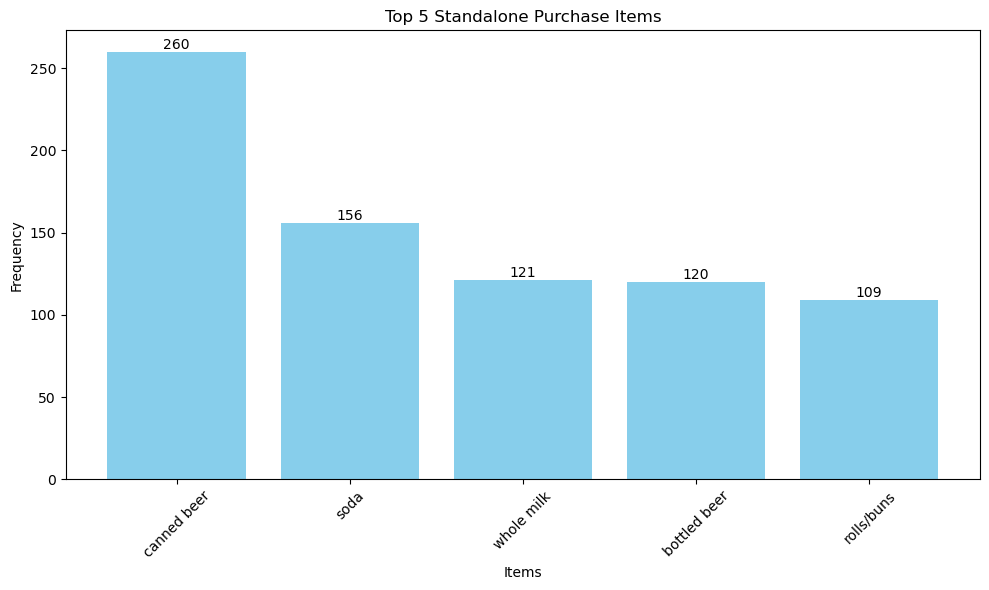

In [69]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top_standalone_items.index, top_standalone_items.values, color='skyblue')
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.title('Top 5 Standalone Purchase Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add values on top of each bar
for bar, value in zip(bars, top_standalone_items.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')
    
# Show the plot
plt.tight_layout()
plt.show()

In [82]:
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
#!pip install adjustText
from adjustText import adjust_text

In [84]:
sentences = []
for i, row in data.iterrows():
    vals = row.values[1:].astype(str)
    
    # Remove the nans
    vals = vals[vals != 'nan']
    
    # Order does not really matter in shopping baskets (unlike English sentences)
    # so this is a form of augmentation
    for _ in range(min(3, len(vals))):
        np.random.shuffle(vals)
        sentences.append(list(vals))
        
print('\n'.join([', '.join(x) for x in sentences[:10]]))

margarine, citrus fruit, ready soups, semi-finished bread
citrus fruit, margarine, ready soups, semi-finished bread
margarine, ready soups, citrus fruit, semi-finished bread
coffee, tropical fruit, yogurt
coffee, tropical fruit, yogurt
coffee, tropical fruit, yogurt
whole milk
yogurt, meat spreads, pip fruit, cream cheese
meat spreads, cream cheese, pip fruit, yogurt
meat spreads, pip fruit, cream cheese, yogurt


In [85]:
print('Embedding {} sentences...'.format(len(sentences)))
    
model = Word2Vec(
    sentences,
    # size=10,
    window=3,
    workers=1,
    sg=0,
    # iter=25,
    negative=25,
    min_count=1,
    seed=42,
    compute_loss=True
)

print(model.get_latest_training_loss())

Embedding 23544 sentences...
1534684.5


169 (169, 100)


/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


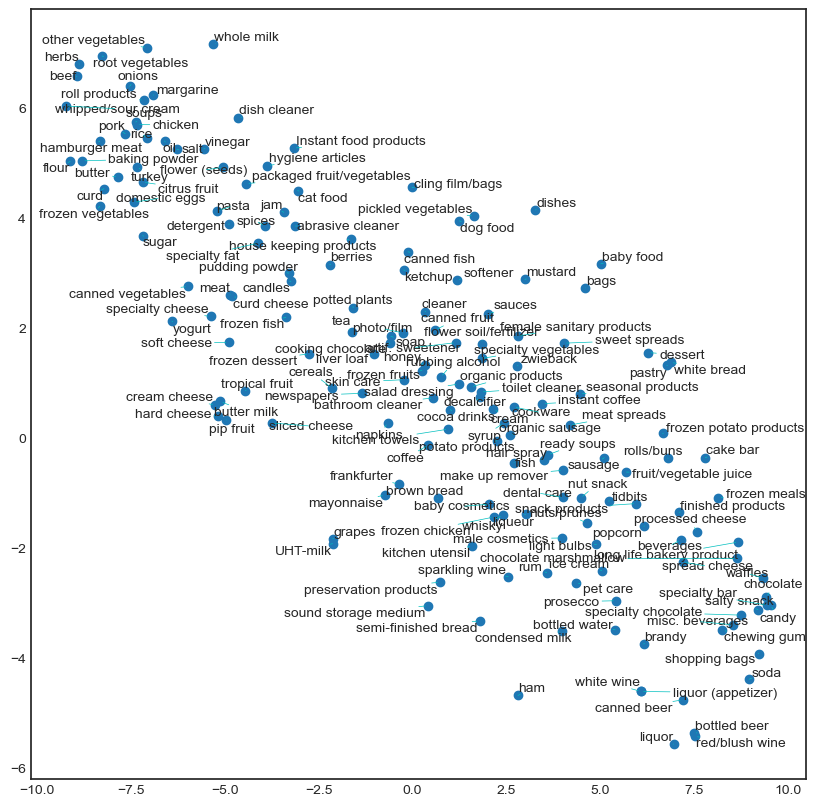

In [86]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 3
# plt.rcParams['axes.labelsize']=20
# plt.rcParams['xtick.labelsize']=16
# plt.rcParams['ytick.labelsize']=16
# plt.rcParams['legend.fontsize']=16

products = list(model.wv.index_to_key)
embeddings = []
for product in products:
    embeddings.append(model.wv[product])
embeddings = np.array(embeddings)
print(len(products), embeddings.shape)

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

texts = []
for x, y, lab in zip(X_tsne[:, 0], X_tsne[:, 1], products):
    text = plt.text(x, y, lab)
    texts.append(text)
    
adjust_text(texts, lim=5, arrowprops=dict(arrowstyle="-", color='c', lw=0.5))
plt.show()

The figure above is generated randomly, therefore the commentary will not make sense if discussing location on the chart. Generally frequent bought together items are shown together. We see for instance that dairy products and vegetable/fruit products are found together. These items are considered similar because they are brough together frequently. Soda, beers, wines, beverages, and liquor appear together as they are frequently brought together

### Transformation

In [87]:
oht = pd.get_dummies(data[transaction_items])

# Generate frequent itemsets using Apriori
frequent_itemsets = apriori(oht, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Print association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support                                           itemsets
0   0.030910                                      (Item 1_beef)
1   0.012303                                   (Item 1_berries)
2   0.018099                              (Item 1_bottled beer)
3   0.017285                             (Item 1_bottled water)
4   0.031520                               (Item 1_canned beer)
..       ...                                                ...
81  0.014032       (Item 2_whole milk, Item 1_other vegetables)
82  0.018302       (Item 3_whole milk, Item 2_other vegetables)
83  0.012506  (Item 2_root vegetables, Item 3_other vegetables)
84  0.017285       (Item 3_other vegetables, Item 4_whole milk)
85  0.010574       (Item 5_whole milk, Item 4_other vegetables)

[86 rows x 2 columns]

Association Rules:
                  antecedents                consequents  antecedent support  \
0       (Item 1_citrus fruit)    (Item 2_tropical fruit)            0.046060   
1     (Ite

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [88]:
# Analyzing the association rules
# Sorting the rules by metrics confidence, lift
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Printing the top 10 rules
top_N = 10
print("Top {} Association Rules:".format(top_N))
print(sorted_rules.head(top_N))

# Filtering rules based on confidence and lift
filtered_rules = sorted_rules[(sorted_rules['confidence'] >= 0.5) & (sorted_rules['lift'] >= 1.5)]
print("\nFiltered Association Rules:")
print(filtered_rules)

Top 10 Association Rules:
                  antecedents                consequents  antecedent support  \
3            (Item 2_sausage)       (Item 1_frankfurter)            0.010066   
12        (Item 5_whole milk)  (Item 4_other vegetables)            0.015150   
11        (Item 4_whole milk)  (Item 3_other vegetables)            0.032028   
10  (Item 3_other vegetables)        (Item 4_whole milk)            0.042196   
13  (Item 4_other vegetables)        (Item 5_whole milk)            0.025826   
6         (Item 3_whole milk)  (Item 2_other vegetables)            0.051449   
7   (Item 2_other vegetables)        (Item 3_whole milk)            0.055923   
8    (Item 2_root vegetables)  (Item 3_other vegetables)            0.038943   
1     (Item 2_tropical fruit)      (Item 1_citrus fruit)            0.036096   
5   (Item 1_other vegetables)        (Item 2_whole milk)            0.046772   

    consequent support   support  confidence       lift  leverage  conviction  \
3           

In [90]:
transactions = grocery_df.values.astype(str).tolist()
transactions = [[item for item in row if item != 'nan'] for row in transactions]
transactions[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [92]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

#Then the data is transformed through one-hot encoding with items as columns and True/False for each purchase.

In [94]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets.count()['itemsets']

333

Now the support is calculated for each items using the apriori algorithm. The apriori algorithm was selected for support greater than 1%, which gives about 99 hits or more in the dataset. This was to ensure that there were enough purchases (instances) that leads to a derived rule. The result was 333 itemsets.

In [95]:
frequent_itemsets.nlargest(n = 20, columns = 'support')

support                        itemsets
86   0.255516                    (whole milk)
55   0.193493              (other vegetables)
66   0.183935                    (rolls/buns)
75   0.174377                          (soda)
87   0.139502                        (yogurt)
6    0.110524                 (bottled water)
67   0.108998               (root vegetables)
81   0.104931                (tropical fruit)
73   0.098526                 (shopping bags)
70   0.093950                       (sausage)
58   0.088968                        (pastry)
19   0.082766                  (citrus fruit)
5    0.080529                  (bottled beer)
52   0.079817                    (newspapers)
12   0.077682                   (canned beer)
60   0.075648                     (pip fruit)
239  0.074835  (other vegetables, whole milk)
37   0.072293         (fruit/vegetable juice)
83   0.071683            (whipped/sour cream)
7    0.064870                   (brown bread)

<AxesSubplot:xlabel='support', ylabel='itemsets'>

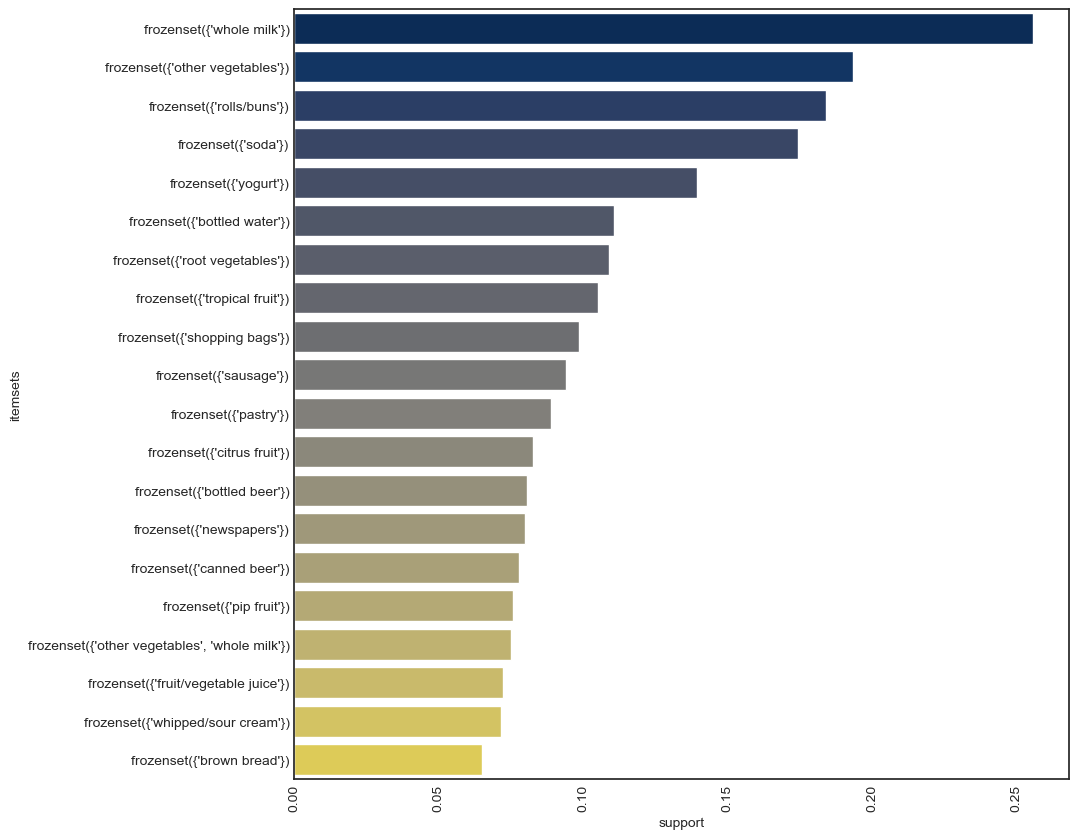

In [96]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(y='itemsets', x='support', data=frequent_itemsets.nlargest(n = 20, columns = 'support'),palette='cividis')

The itemsets are ranked by support level below. The figures below show the dominant itemsets, which is whole milk and other vegetables (as we’ve figured out so far in this study). The combination of these two even shows up in the top 20 (see itemset 239 below).
Three other items that show up frequently is rolls/buns, soda and yogurt. We’ll keep track of these items as well since it seems that they’ll feature strongly as well.

### Extract Rules

An antecedent is something that comes before a behavior and may trigger that behavior. A behavior is anything an individual does. A consequence is something that follows the behavior. The rules provide the confidence, lift and many more metrics to determine the consequents and antecedents.

First step is to determine the lift threshold to prevent too many rules from being extracted.

In [97]:
rules_plot_lift = []
for conf in np.linspace(0,4,20):
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=conf)
    rules_plot_lift.append(len(rules))

Text(0, 0.5, 'No of rules')

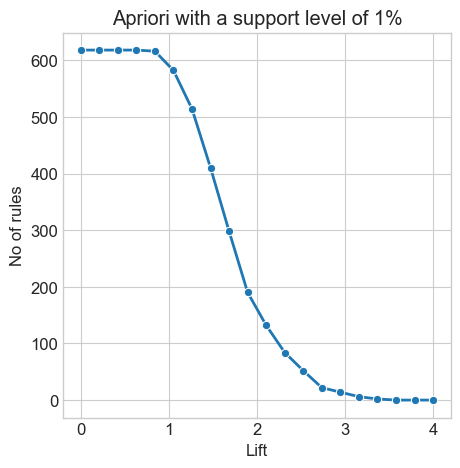

In [99]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,4,20),
             y=rules_plot_lift,
             # style="logic",
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Lift')
plt.ylabel('No of rules')

In [100]:
rules_plot_conf = []
for conf in np.linspace(0,1,20):
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
    rules_plot_conf.append(len(rules))

Text(0, 0.5, 'No of rules')

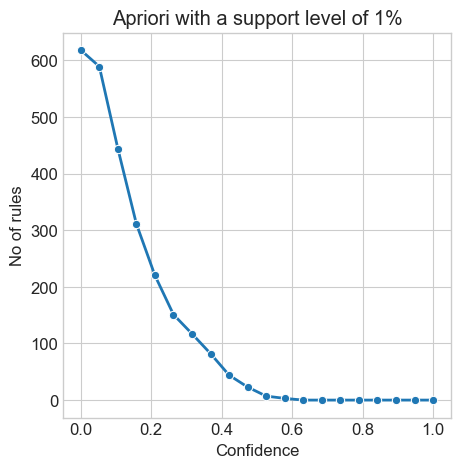

In [101]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
sns.lineplot(x=np.linspace(0,1,20),
             y=rules_plot_conf,
             # style="logic",
             marker='o')
plt.title("Apriori with a support level of 1%")
plt.xlabel('Confidence')
plt.ylabel('No of rules')

The metric that was used was confidence, where the confidence threshold was set at 40%. This was simply to ensure that the result is not overwhelmed with too many rules. Another check was for lift (shown in the figure above). The checks show how the number of rules can grow if confidence threshold is relaxed. Above shows the growth with lift as metric. The charts become unreadable when more than 70 rules are extracted.

Confidence as metric

In [102]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.40)
# Lift measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are.
# A lift of 1 will then mean that both of the items are actually independent and without any association.
# For any value higher than 1, lift shows that there is actually an association. 
# The higher the value, the higher the association.
# rules = rules[rules['confidence']<0.3]
rules.sort_values(by=['confidence'], ascending=False).head(100)

antecedents         consequents  antecedent support  \
28    (root vegetables, citrus fruit)  (other vegetables)            0.017692   
43  (root vegetables, tropical fruit)  (other vegetables)            0.021047   
32                     (curd, yogurt)        (whole milk)            0.017285   
26         (other vegetables, butter)        (whole milk)            0.020031   
58  (root vegetables, tropical fruit)        (whole milk)            0.021047   
..                                ...                 ...                 ...   
49       (tropical fruit, whole milk)  (other vegetables)            0.042298   
21                   (tropical fruit)        (whole milk)            0.104931   
17               (whipped/sour cream)  (other vegetables)            0.071683   
14                              (oil)        (whole milk)            0.028063   
24                           (yogurt)        (whole milk)            0.139502   

    consequent support   support  confidence      lift  leverage  conviction  \
28            0.193493  0.010371    0.586207  3.029608  0.006948    1.949059   
43            0.193493  0.012303    0.584541  3.020999  0.008231    1.941244   
32            0.255516  0.010066    0.582353  2.279125  0.005649    1.782567   
26            0.255516  0.011490    0.573604  2.244885  0.006371    1.745992   
58            0.255516  0.011998    0.570048  2.230969  0.006620    1.731553   
..                 ...       ...         ...       ...       ...         ...   
49            0.193493  0.017082    0.403846  2.087140  0.008898    1.352851   
21            0.255516  0.042298    0.403101  1.577595  0.015486    1.247252   
17            0.193493  0.028876    0.402837  2.081924  0.015006    1.350565   
14            0.255516  0.011286    0.402174  1.573968  0.004116    1.245319   
24            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132   

    zhangs_metric  
28       0.681990  
43       0.683367  
32       0.571107  
26       0.565878  
58       0.563627  
..            ...  
49       0.543880  
21       0.409045  
17       0.559803  
14       0.375192  
24       0.422732  

[62 rows x 10 columns]

In [103]:
rules.shape

(62, 10)

The table below is simply to clean up the output. Conspicuously absent from the consequents are rolls/buns, soda and yogurt. The confidence must be relaxed to 30% to start seeing yogurt and rolls/buns, but soda is then still absent from the rules. This is unexpected.

In [104]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

antecedents         consequents   support  \
28    (root vegetables, citrus fruit)  (other vegetables)  0.010371   
43  (root vegetables, tropical fruit)  (other vegetables)  0.012303   
32                     (curd, yogurt)        (whole milk)  0.010066   
26         (other vegetables, butter)        (whole milk)  0.011490   
58  (root vegetables, tropical fruit)        (whole milk)  0.011998   
..                                ...                 ...       ...   
49       (tropical fruit, whole milk)  (other vegetables)  0.017082   
21                   (tropical fruit)        (whole milk)  0.042298   
17               (whipped/sour cream)  (other vegetables)  0.028876   
14                              (oil)        (whole milk)  0.011286   
24                           (yogurt)        (whole milk)  0.056024   

    confidence      lift  leverage  zhangs_metric  rule  
28    0.586207  3.029608  0.006948       0.681990    28  
43    0.584541  3.020999  0.008231       0.683367    43  
32    0.582353  2.279125  0.005649       0.571107    32  
26    0.573604  2.244885  0.006371       0.565878    26  
58    0.570048  2.230969  0.006620       0.563627    58  
..         ...       ...       ...            ...   ...  
49    0.403846  2.087140  0.008898       0.543880    49  
21    0.403101  1.577595  0.015486       0.409045    21  
17    0.402837  2.081924  0.015006       0.559803    17  
14    0.402174  1.573968  0.004116       0.375192    14  
24    0.401603  1.571735  0.020379       0.422732    24  

[62 rows x 8 columns]

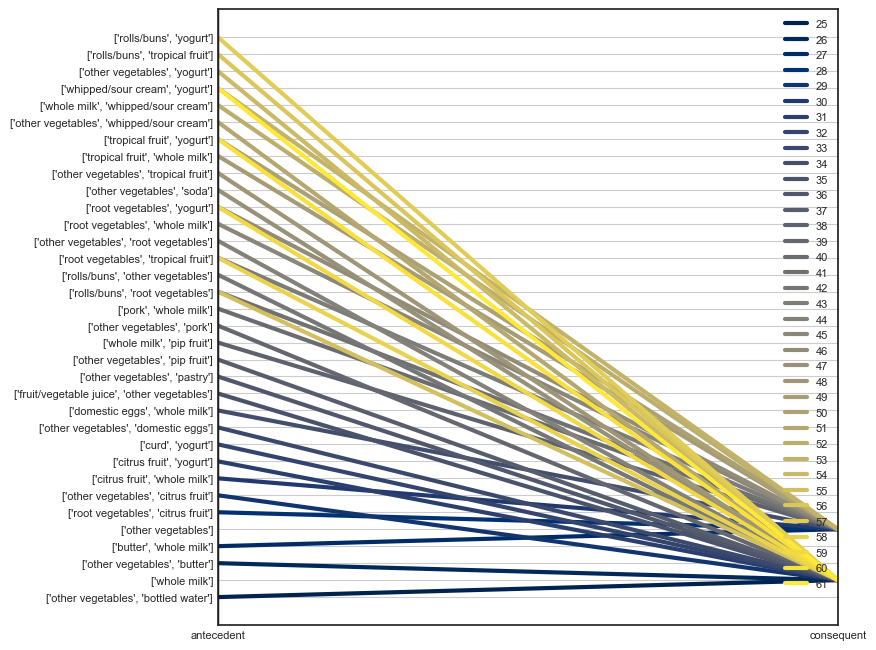

In [105]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 3

from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

parallel_coordinates(coords,'rule', colormap = 'cividis')
plt.show()

The parallel coordinates plot below shows that the most connected consequents are whole milk and other vegetables for rules with a support of >0.01, confidence level greater than 30% and at least two antecedents. It is interesting that in this case there are no consequents with length 2 or more. We can see that there are certain itemsets that lead to both consequents, although they’re not clear on this figure, another visualization will be used to make it clearer.

In [106]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

antecedents         consequents   support  \
25          (other vegetables, bottled water)        (whole milk)  0.010778   
26                 (other vegetables, butter)        (whole milk)  0.011490   
27                       (butter, whole milk)  (other vegetables)  0.011490   
28            (root vegetables, citrus fruit)  (other vegetables)  0.010371   
29           (other vegetables, citrus fruit)        (whole milk)  0.013015   
30                 (citrus fruit, whole milk)  (other vegetables)  0.013015   
31                     (citrus fruit, yogurt)        (whole milk)  0.010269   
32                             (curd, yogurt)        (whole milk)  0.010066   
33          (other vegetables, domestic eggs)        (whole milk)  0.012303   
34                (domestic eggs, whole milk)  (other vegetables)  0.012303   
35  (fruit/vegetable juice, other vegetables)        (whole milk)  0.010473   
36                 (other vegetables, pastry)        (whole milk)  0.010574   
37              (other vegetables, pip fruit)        (whole milk)  0.013523   
38                    (whole milk, pip fruit)  (other vegetables)  0.013523   
39                   (other vegetables, pork)        (whole milk)  0.010168   
40                         (pork, whole milk)  (other vegetables)  0.010168   
41              (rolls/buns, root vegetables)  (other vegetables)  0.012201   
42             (rolls/buns, other vegetables)        (whole milk)  0.017895   
43          (root vegetables, tropical fruit)  (other vegetables)  0.012303   
44        (other vegetables, root vegetables)        (whole milk)  0.023183   

    confidence      lift  leverage  zhangs_metric  rule  \
25    0.434426  1.700192  0.004439       0.422308    25   
26    0.573604  2.244885  0.006371       0.565878    26   
27    0.416974  2.154987  0.006158       0.551147    27   
28    0.586207  3.029608  0.006948       0.681990    28   
29    0.450704  1.763898  0.005636       0.445951    29   
30    0.426667  2.205080  0.007113       0.563696    30   
31    0.474178  1.855768  0.004736       0.471348    31   
32    0.582353  2.279125  0.005649       0.571107    32   
33    0.552511  2.162336  0.006613       0.549779    33   
34    0.410169  2.119820  0.006499       0.544597    34   
35    0.497585  1.947371  0.005095       0.496947    35   
36    0.468468  1.833421  0.004807       0.465069    36   
37    0.517510  2.025351  0.006846       0.519843    37   
38    0.449324  2.322178  0.007700       0.587038    38   
39    0.469484  1.837394  0.004634       0.465840    39   
40    0.458716  2.370714  0.005879       0.591293    40   
41    0.502092  2.594890  0.007499       0.629935    41   
42    0.420048  1.643919  0.007010       0.409128    42   
43    0.584541  3.020999  0.008231       0.683367    43   
44    0.489270  1.914833  0.011076       0.501524    44   

                                       antecedent            consequent  
25          ['other vegetables', 'bottled water']        ['whole milk']  
26                 ['other vegetables', 'butter']        ['whole milk']  
27                       ['butter', 'whole milk']  ['other vegetables']  
28            ['root vegetables', 'citrus fruit']  ['other vegetables']  
29           ['other vegetables', 'citrus fruit']        ['whole milk']  
30                 ['citrus fruit', 'whole milk']  ['other vegetables']  
31                     ['citrus fruit', 'yogurt']        ['whole milk']  
32                             ['curd', 'yogurt']        ['whole milk']  
33          ['other vegetables', 'domestic eggs']        ['whole milk']  
34                ['domestic eggs', 'whole milk']  ['other vegetables']  
35  ['fruit/vegetable juice', 'other vegetables']        ['whole milk']  
36                 ['other vegetables', 'pastry']        ['whole milk']  
37              ['other vegetables', 'pip fruit']        ['whole milk']  
38                    ['whole milk', 'pip fruit']  ['other vegetables']  
39                   ['o

The pairplot below shows the relationship between metrics. Although interesting, it tells us little about the relationship items have with each other. An interesting portion is the low correlation between support and confidence. Another interesting portion is that the rules are not specifically arranged in any order when evaluating support and confidence, although a pattern seems to emerge for lift and confidence.

A better approach would be to draw network diagrams.

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 1000x1000 with 0 Axes>

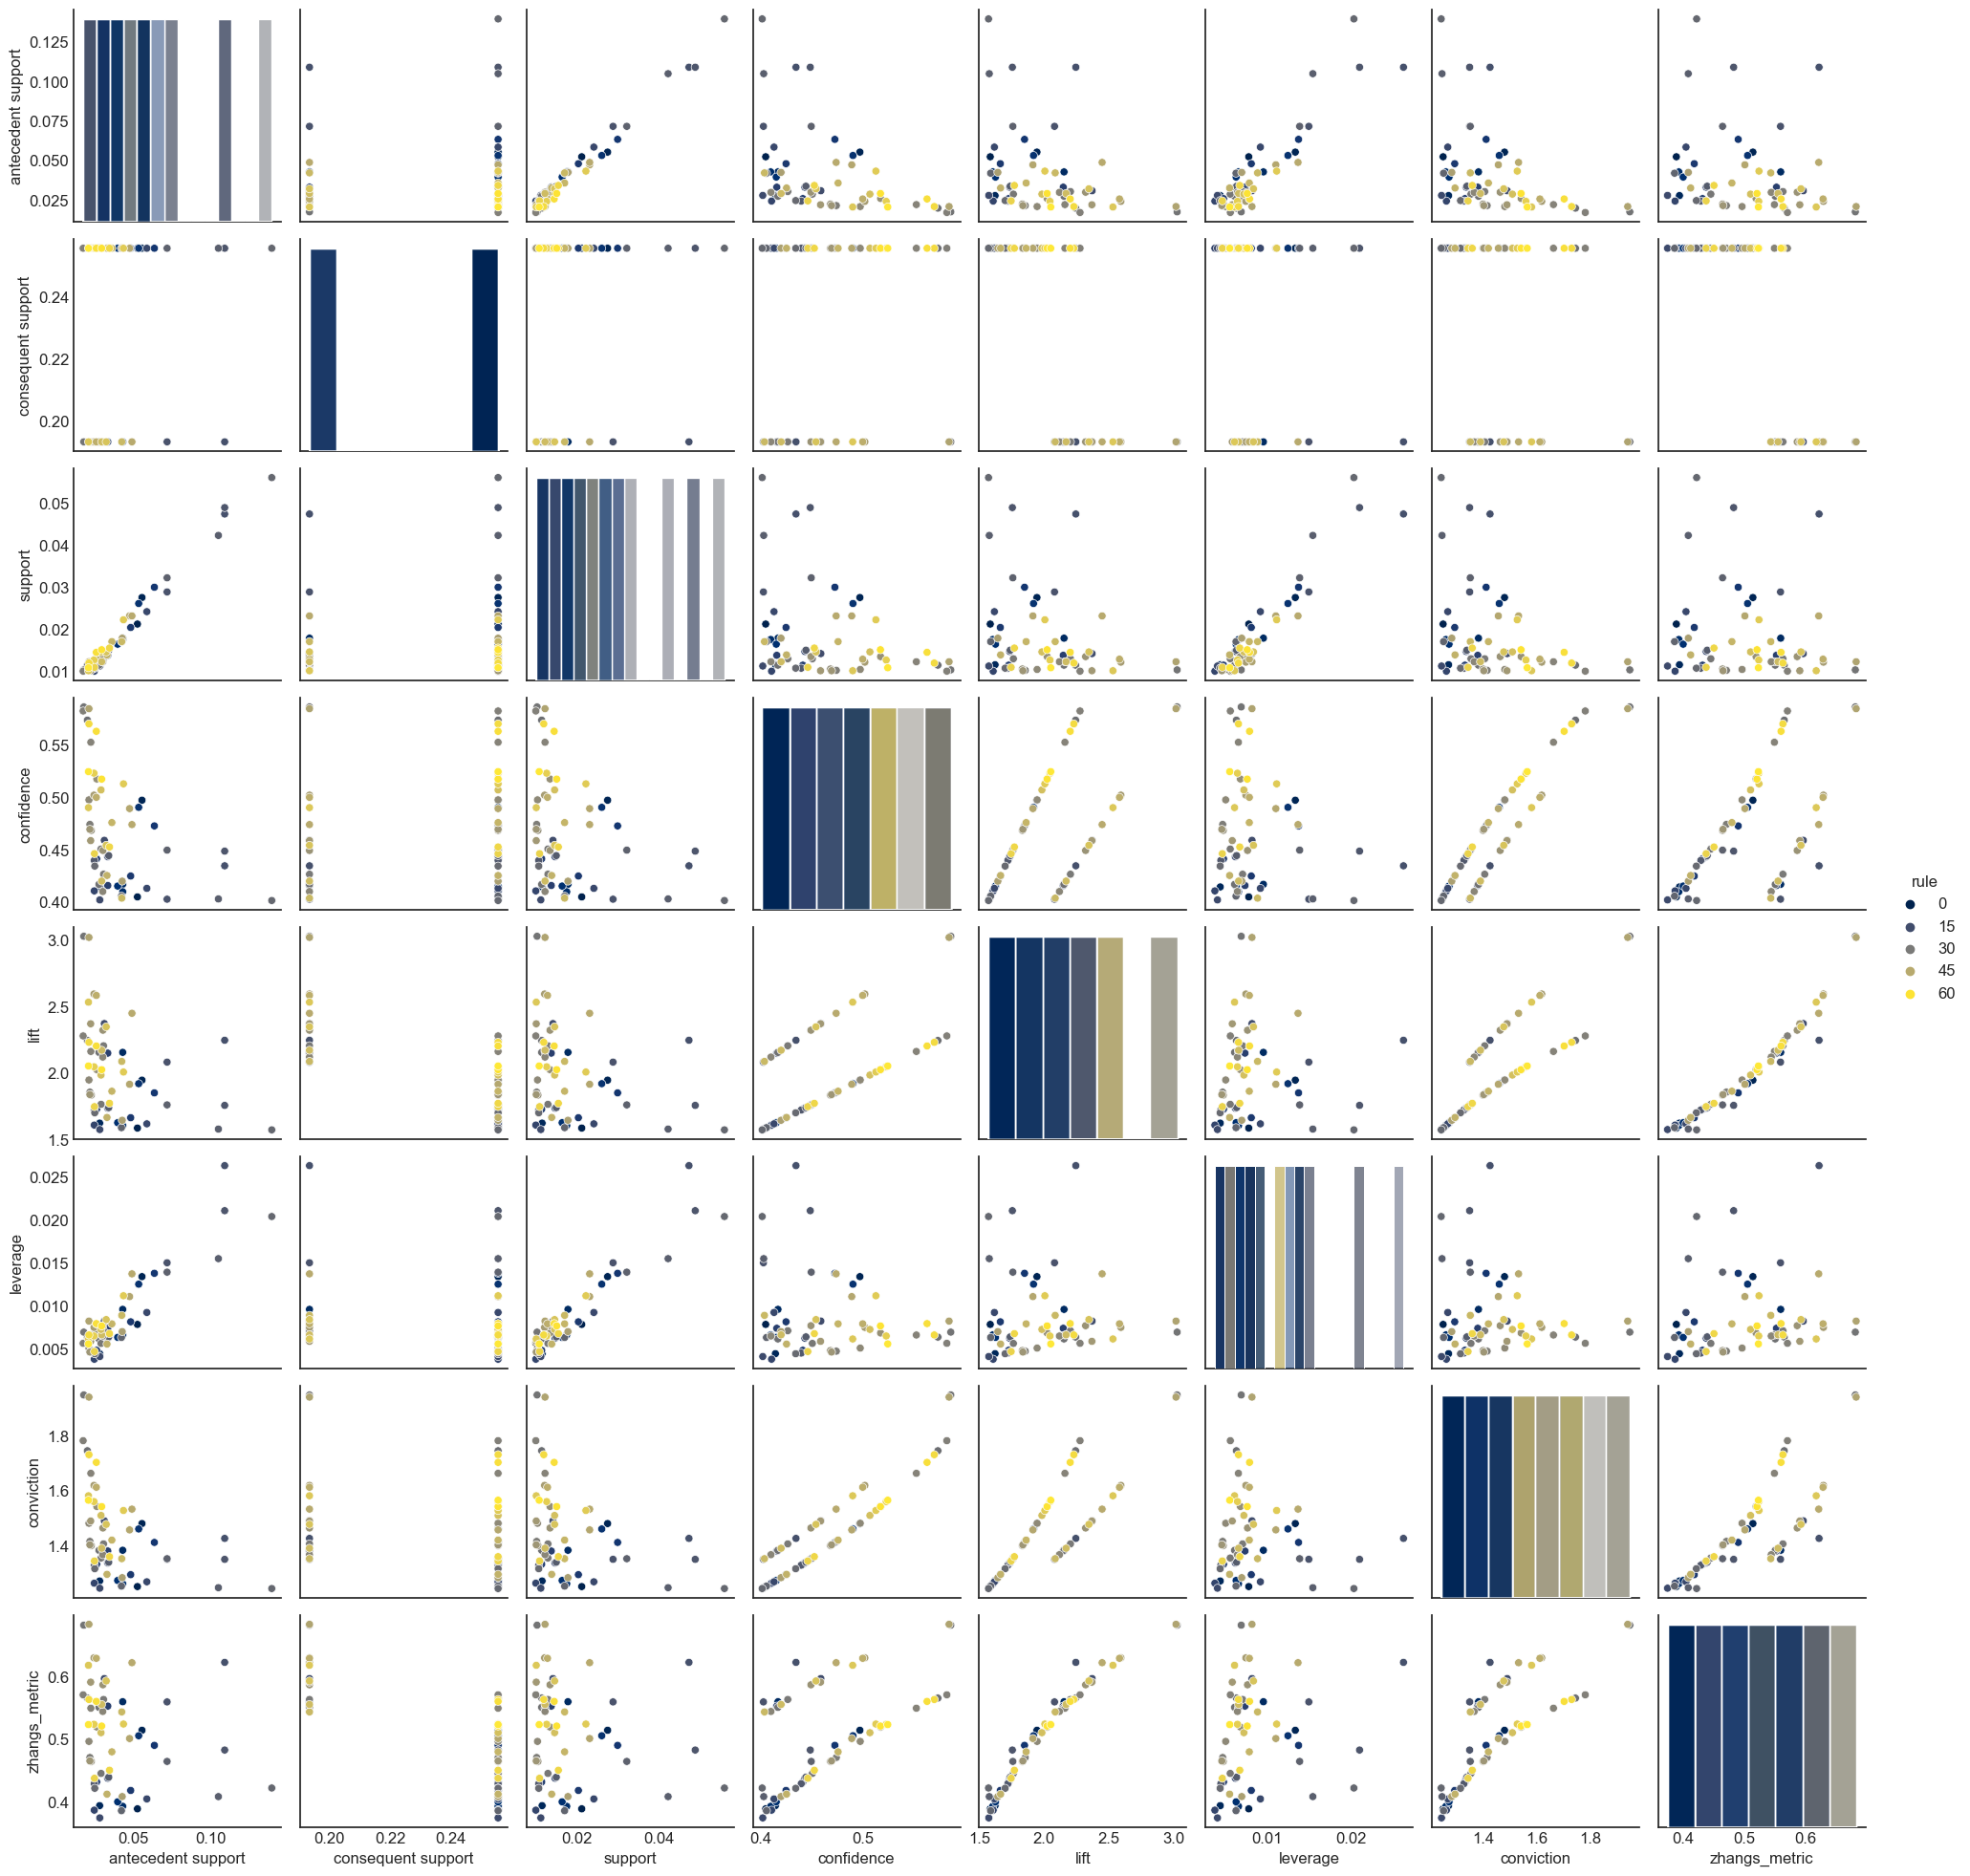

<Figure size 800x800 with 0 Axes>

In [107]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             rules.drop(['antecedent_len','consequent_len'],axis=1),
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='cividis',
             hue='rule'
            )

# g = g.map_diag(sns.kdeplot, lw=2)
# g = g.map_offdiag(sns.kdeplot, lw=0.5)
plt.show()
sns.despine()

In [108]:
import networkx as nx
rules.sort_values(['confidence']).head()

antecedents         consequents  antecedent support  \
24                      (yogurt)        (whole milk)            0.139502   
14                         (oil)        (whole milk)            0.028063   
17          (whipped/sour cream)  (other vegetables)            0.071683   
21              (tropical fruit)        (whole milk)            0.104931   
49  (tropical fruit, whole milk)  (other vegetables)            0.042298   

    consequent support   support  confidence      lift  leverage  conviction  \
24            0.255516  0.056024    0.401603  1.571735  0.020379    1.244132   
14            0.255516  0.011286    0.402174  1.573968  0.004116    1.245319   
17            0.193493  0.028876    0.402837  2.081924  0.015006    1.350565   
21            0.255516  0.042298    0.403101  1.577595  0.015486    1.247252   
49            0.193493  0.017082    0.403846  2.087140  0.008898    1.352851   

    zhangs_metric  antecedent_len  consequent_len  rule  \
24       0.422732               1               1    24   
14       0.375192               1               1    14   
17       0.559803               1               1    17   
21       0.409045               1               1    21   
49       0.543880               2               1    49   

                          antecedent            consequent  
24                        ['yogurt']        ['whole milk']  
14                           ['oil']        ['whole milk']  
17            ['whipped/sour cream']  ['other vegetables']  
21                ['tropical fruit']        ['whole milk']  
49  ['tropical fruit', 'whole milk']  ['other vegetables']

In [109]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

 Whole milk and other vegetables seem to be strong nodes (consequents) that follow from most purchased items.

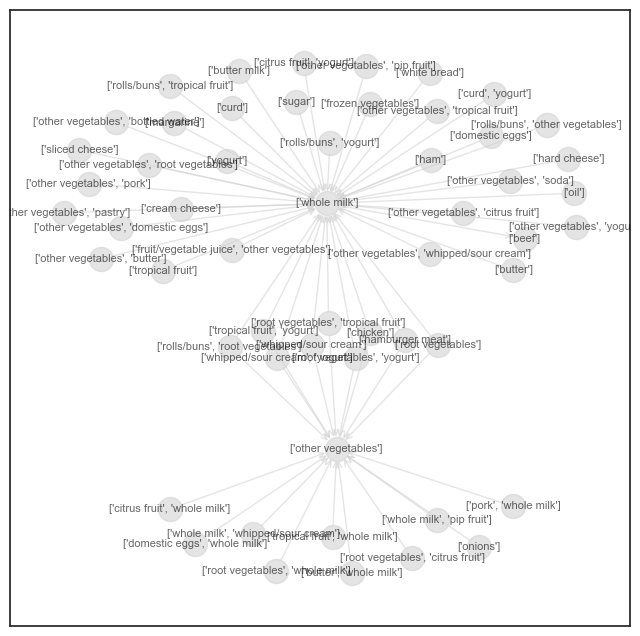

In [110]:
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules['support'].iloc[:47]
                )

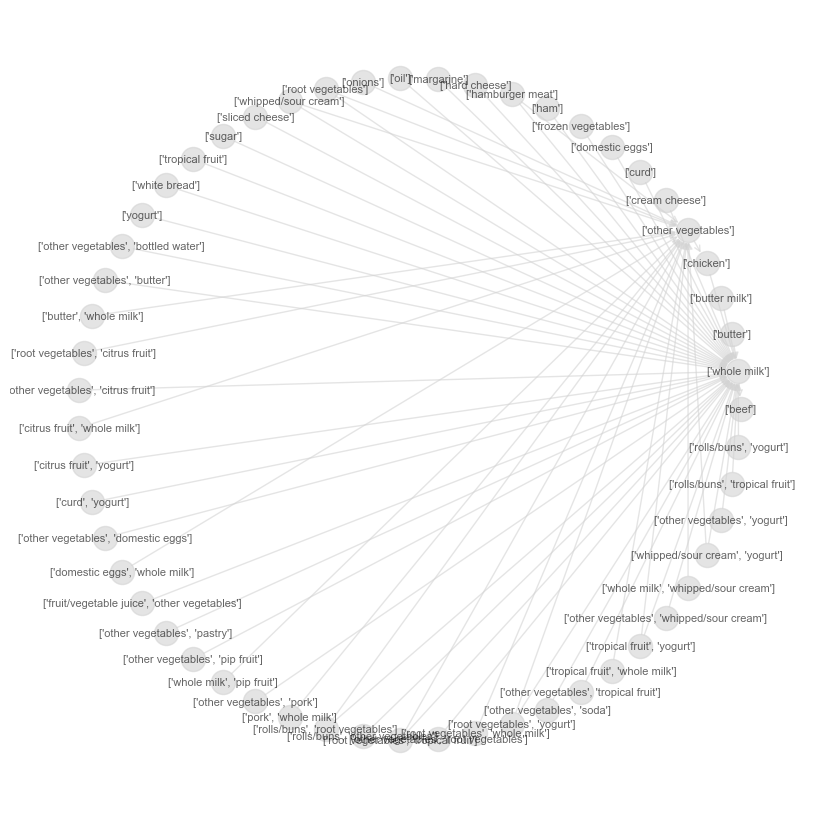

In [111]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules.sort_values(['support'])['support'].iloc[:47]
                )

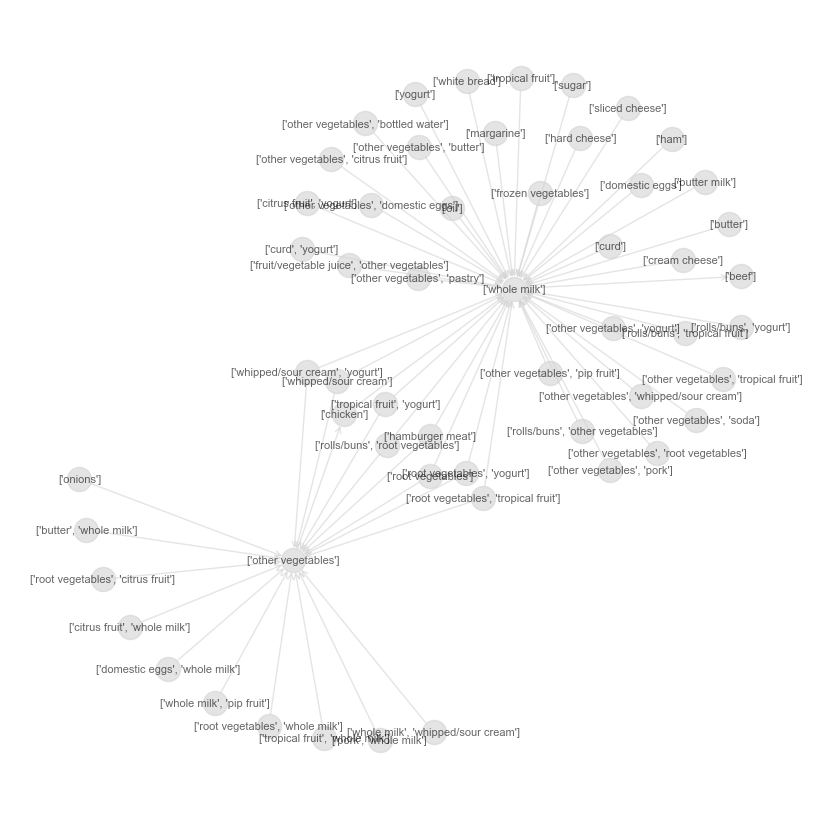

In [112]:
plt.rcParams['figure.figsize']=8,8
nx.draw_kamada_kawai(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey',
                )

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    '''
    Goal: This function create an scatter plot for categorical variables. It's useful to compare two lists with elements in common.
    Input:
        - df: required. pandas DataFrame with at least two columns with categorical variables you want to relate, and the value of both (if it's just an adjacent matrix write 1)
        - colx: required. The name of the column to display horizontaly
        - coly: required. The name of the column to display vertically
        - cols: required. The name of the column with the value between the two variables
        - color: optional. Colors to display in the visualization, the length can be two or three. The two first are the colors for the lines in the matrix, the last one the font color and markers color.
            default ['grey','black']
        - ratio: optional. A ratio for controlling the relative size of the markers.
            default 10
        - font: optional. The font for the ticks on the matrix.
            default 'Helvetica'
        - save: optional. True for saving as an image in the same path as the code.
            default False
        - save_name: optional. The name used for saving the image (then the code ads .png)
            default: "Default"
    Output:
        No output. Matplotlib object is not shown by default to be able to add more changes.
    '''
    # Create a dict to encode the categeories into numbers (sorted)
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))
    
    # Apply the encoding
    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])
    
    
    # Prepare the aspect of the plot
    plt.rcParams['figure.figsize']=10,3 
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']='darkslategrey'
    plt.rcParams['ytick.color']='darkslategrey'
    plt.box(False)

    
    # Plot all the lines for the background
    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linewidth=0.5,color='lightgray',alpha=0.8)
        
    # Plot the scatter plot with the numbers
    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color='gray')
    
    # Change the ticks numbers to categories and limit them
    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))

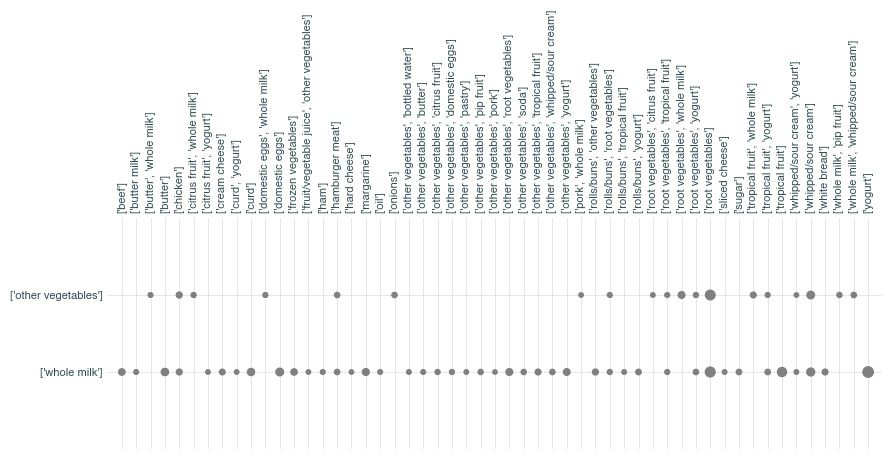

In [115]:
kcolors=['#F73972','#F2B3C6','#144962']
# create the plot
catscatter(rules,'antecedent','consequent','support',color=kcolors, ratio=1000)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

The category scatterplot above show that whole milk is the most frequent consequent (y-axis). The size of the marks on the chart is the support, showing that root vegetables have the most support for both whole milk and other vegetables, and that yogurt the next best for whole milk.

Lift as Metric

In [116]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=2.40)
# Lift measures how likely an item is purchased when another item is purchased, while controlling for how popular both items are.
# A lift of 1 will then mean that both of the items are actually independent and without any association.
# For any value higher than 1, lift shows that there is actually an association. 
# The higher the value, the higher the association.
# rules = rules[rules['confidence']<0.3]
rules.sort_values(by=['confidence'], ascending=False).head(100)

antecedents                        consequents  \
12    (root vegetables, citrus fruit)                 (other vegetables)   
30  (root vegetables, tropical fruit)                 (other vegetables)   
24      (rolls/buns, root vegetables)                 (other vegetables)   
39          (root vegetables, yogurt)                 (other vegetables)   
50       (whipped/sour cream, yogurt)                 (other vegetables)   
..                                ...                                ...   
40                 (other vegetables)          (root vegetables, yogurt)   
31                 (other vegetables)  (root vegetables, tropical fruit)   
27                 (other vegetables)      (rolls/buns, root vegetables)   
13                 (other vegetables)    (root vegetables, citrus fruit)   
51                 (other vegetables)       (whipped/sour cream, yogurt)   

    antecedent support  consequent support   support  confidence      lift  \
12            0.017692            0.193493  0.010371    0.586207  3.029608   
30            0.021047            0.193493  0.012303    0.584541  3.020999   
24            0.024301            0.193493  0.012201    0.502092  2.594890   
39            0.025826            0.193493  0.012913    0.500000  2.584078   
50            0.020742            0.193493  0.010168    0.490196  2.533410   
..                 ...                 ...       ...         ...       ...   
40            0.193493            0.025826  0.012913    0.066737  2.584078   
31            0.193493            0.021047  0.012303    0.063584  3.020999   
27            0.193493            0.024301  0.012201    0.063058  2.594890   
13            0.193493            0.017692  0.010371    0.053600  3.029608   
51            0.193493            0.020742  0.010168    0.052549  2.533410   

    leverage  conviction  zhangs_metric  
12  0.006948    1.949059       0.681990  
30  0.008231    1.941244       0.683367  
24  0.007499    1.619792       0.629935  
39  0.007916    1.613015       0.629266  
50  0.006154    1.581995       0.618096  
..       ...         ...            ...  
40  0.007916    1.043836       0.760086  
31  0.008231    1.045425       0.829482  
27  0.007499    1.041366       0.762085  
13  0.006948    1.037941       0.830649  
51  0.006154    1.033570       0.750489  

[64 rows x 10 columns]

In [117]:
rules.shape

(64, 10)

Lift is the metric in this section, where a threshold of 2.4 is chosen to keep the number of rules (64) manageable

Soda is then still absent from the rules shown in the table below. This is unexpected.

In [118]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequent_len"] = rules["consequents"].apply(lambda x: len(x))
rules['rule'] = rules.index
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1).sort_values(by=['confidence'], ascending=False).head(100)

antecedents                        consequents  \
12    (root vegetables, citrus fruit)                 (other vegetables)   
30  (root vegetables, tropical fruit)                 (other vegetables)   
24      (rolls/buns, root vegetables)                 (other vegetables)   
39          (root vegetables, yogurt)                 (other vegetables)   
50       (whipped/sour cream, yogurt)                 (other vegetables)   
..                                ...                                ...   
40                 (other vegetables)          (root vegetables, yogurt)   
31                 (other vegetables)  (root vegetables, tropical fruit)   
27                 (other vegetables)      (rolls/buns, root vegetables)   
13                 (other vegetables)    (root vegetables, citrus fruit)   
51                 (other vegetables)       (whipped/sour cream, yogurt)   

     support  confidence      lift  leverage  zhangs_metric  rule  
12  0.010371    0.586207  3.029608  0.006948       0.681990    12  
30  0.012303    0.584541  3.020999  0.008231       0.683367    30  
24  0.012201    0.502092  2.594890  0.007499       0.629935    24  
39  0.012913    0.500000  2.584078  0.007916       0.629266    39  
50  0.010168    0.490196  2.533410  0.006154       0.618096    50  
..       ...         ...       ...       ...            ...   ...  
40  0.012913    0.066737  2.584078  0.007916       0.760086    40  
31  0.012303    0.063584  3.020999  0.008231       0.829482    31  
27  0.012201    0.063058  2.594890  0.007499       0.762085    27  
13  0.010371    0.053600  3.029608  0.006948       0.830649    13  
51  0.010168    0.052549  2.533410  0.006154       0.750489    51  

[64 rows x 8 columns]

The parallel coordinates plot below shows that the most connected consequents are whole milk and other vegetables for rules with a support of >0.01, lift level greater than 2.4 and at least two antecedents. It is interesting that in this case there are no consequents with length 2 or more. We can see that there are certain itemsets that lead to both consequents, although they’re not clear on this figure, another visualization will be used to make it clearer.

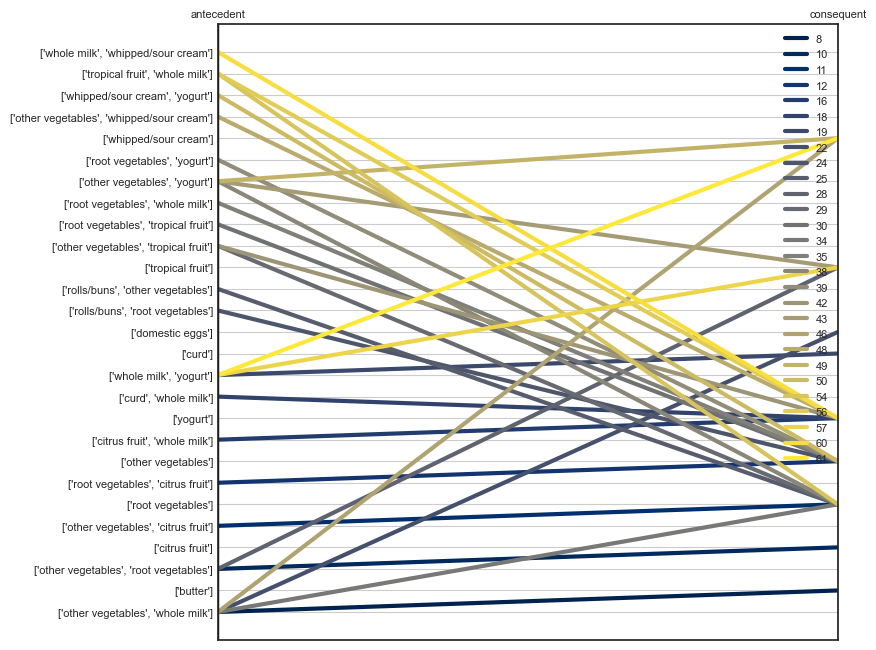

In [119]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 8
plt.rcParams['lines.linewidth'] = 3

from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
coords = rules[['antecedent','consequent','rule']][rules['antecedent_len']>1]

parallel_coordinates(coords,'rule', colormap = 'cividis')
plt.show()

In [120]:
rules.drop(['antecedent support','consequent support','conviction','antecedent_len','consequent_len'],axis=1)[rules['antecedent_len'] >= 2].head(20)

antecedents           consequents   support  \
8        (other vegetables, whole milk)              (butter)  0.011490   
10  (other vegetables, root vegetables)        (citrus fruit)  0.010371   
11     (other vegetables, citrus fruit)     (root vegetables)  0.010371   
12      (root vegetables, citrus fruit)    (other vegetables)  0.010371   
16           (citrus fruit, whole milk)              (yogurt)  0.010269   
18                   (curd, whole milk)              (yogurt)  0.010066   
19                 (whole milk, yogurt)                (curd)  0.010066   
22       (other vegetables, whole milk)       (domestic eggs)  0.012303   
24        (rolls/buns, root vegetables)    (other vegetables)  0.012201   
25       (rolls/buns, other vegetables)     (root vegetables)  0.012201   
28  (other vegetables, root vegetables)      (tropical fruit)  0.012303   
29   (other vegetables, tropical fruit)     (root vegetables)  0.012303   
30    (root vegetables, tropical fruit)    (other vegetables)  0.012303   
34       (other vegetables, whole milk)     (root vegetables)  0.023183   
35        (root vegetables, whole milk)    (other vegetables)  0.023183   
38           (other vegetables, yogurt)     (root vegetables)  0.012913   
39            (root vegetables, yogurt)    (other vegetables)  0.012913   
42   (other vegetables, tropical fruit)              (yogurt)  0.012303   
43           (other vegetables, yogurt)      (tropical fruit)  0.012303   
46       (other vegetables, whole milk)  (whipped/sour cream)  0.014642   

    confidence      lift  leverage  zhangs_metric  rule  \
8     0.153533  2.770630  0.007343       0.690764     8   
10    0.218884  2.644626  0.006450       0.652806    10   
11    0.359155  3.295045  0.007224       0.717225    11   
12    0.586207  3.029608  0.006948       0.681990    12   
16    0.336667  2.413350  0.006014       0.604064    16   
18    0.385214  2.761356  0.006421       0.654974    18   
19    0.179673  3.372304  0.007081       0.745217    19   
22    0.164402  2.591178  0.007555       0.663747    22   
24    0.502092  2.594890  0.007499       0.629935    24   
25    0.286396  2.627525  0.007558       0.646977    25   
28    0.259657  2.474538  0.007331       0.625523    28   
29    0.342776  3.144780  0.008391       0.707403    29   
30    0.584541  3.020999  0.008231       0.683367    30   
34    0.309783  2.842082  0.015026       0.700572    34   
35    0.474012  2.449770  0.013719       0.622230    35   
38    0.297424  2.728698  0.008181       0.662279    38   
39    0.500000  2.584078  0.007916       0.629266    39   
42    0.342776  2.457146  0.007296       0.615101    42   
43    0.283372  2.700550  0.007747       0.658285    43   
46    0.195652  2.729417  0.009277       0.684874    46   

                                 antecedent              consequent  
8        ['other vegetables', 'whole milk']              ['butter']  
10  ['other vegetables', 'root vegetables']        ['citrus fruit']  
11     ['other vegetables', 'citrus fruit']     ['root vegetables']  
12      ['root vegetables', 'citrus fruit']    ['other vegetables']  
16           ['citrus fruit', 'whole milk']              ['yogurt']  
18                   ['curd', 'whole milk']              ['yogurt']  
19                 ['whole milk', 'yogurt']                ['curd']  
22       ['other vegetables', 'whole milk']       ['domestic eggs']  
24        ['rolls/buns', 'root vegetables']    ['other vegetables']  
25       ['rolls/buns', 'other vegetables']     ['root vegetables']  
28  ['other vegetables', 'root vegetables']      ['tropical fruit']  
29   ['other vegetables', 'tropical fruit']     ['root vegetables']  
30    ['root vegetables', 'tropical fruit']    ['other vegetables']  
34       ['other vegetables', 'whole milk']     ['root vegetables']  
35        ['root vegetables', 'whole milk']    ['other vegetables']  
38           ['other vegetables', 'yogurt']     ['root vegetables']  
39            ['root v

This section is where the rules are visualized and we try to make some sense of it all

The pairplot below shows the relationship between metrics. Although interesting, it tells us little about the relationship items have with each other. An interesting portion is the low correlation between support and confidence. Another interesting portion is that the rules are not specifically arranged in any order when evaluating support and confidence, although a pattern seems to emerge for lift and confidence.

A better approach would be to draw network diagrams.

/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):
/Users/abhi/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


<Figure size 1000x1000 with 0 Axes>

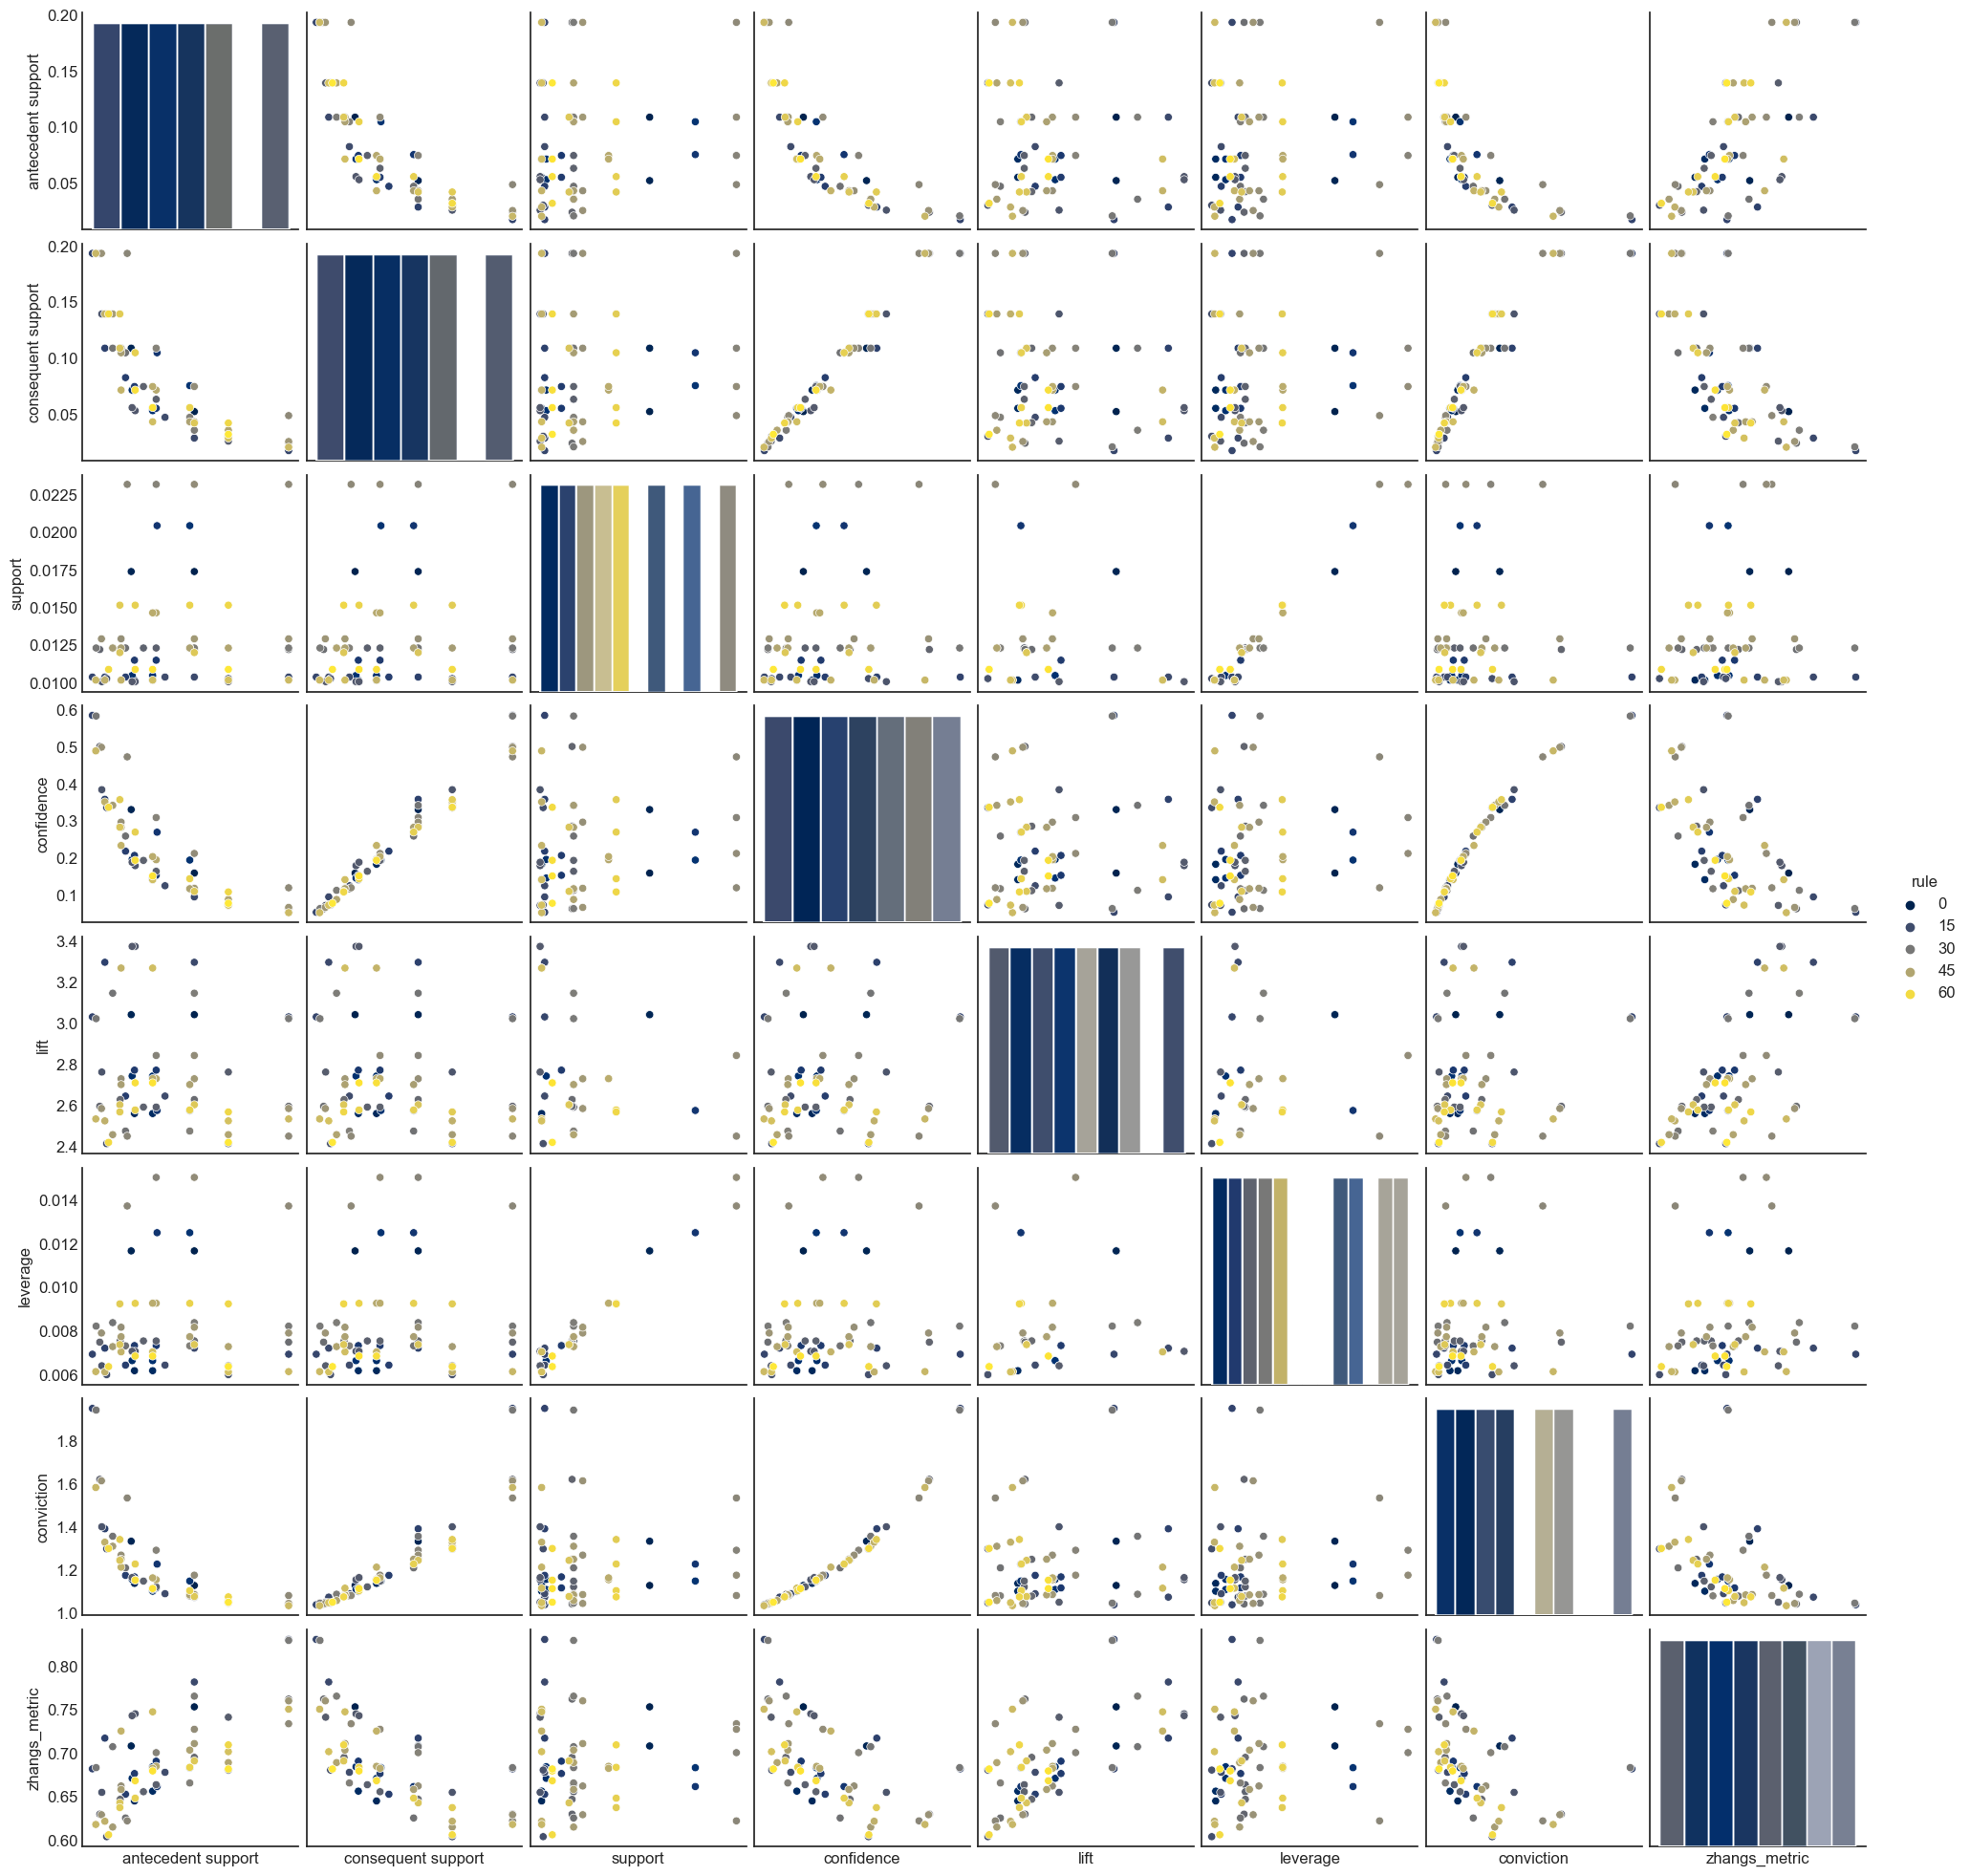

<Figure size 800x800 with 0 Axes>

In [121]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=8,8 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 3

plt.figure(figsize=(10,10))
sns.set_style('white')
plot_kws={"s": 1}
g = sns.pairplot(
             rules.drop(['antecedent_len','consequent_len'],axis=1),
             # kind='reg',
             diag_kind='hist',
             corner=False,
             # plot_kws=dict(scatter_kws=dict(s=5)),
             palette='cividis',
             hue='rule'
            )

# g = g.map_diag(sns.kdeplot, lw=2)
# g = g.map_offdiag(sns.kdeplot, lw=0.5)
plt.show()
sns.despine()

In [122]:
rules.sort_values(['confidence']).head()

antecedents                        consequents  antecedent support  \
51  (other vegetables)       (whipped/sour cream, yogurt)            0.193493   
13  (other vegetables)    (root vegetables, citrus fruit)            0.193493   
27  (other vegetables)      (rolls/buns, root vegetables)            0.193493   
31  (other vegetables)  (root vegetables, tropical fruit)            0.193493   
40  (other vegetables)          (root vegetables, yogurt)            0.193493   

    consequent support   support  confidence      lift  leverage  conviction  \
51            0.020742  0.010168    0.052549  2.533410  0.006154    1.033570   
13            0.017692  0.010371    0.053600  3.029608  0.006948    1.037941   
27            0.024301  0.012201    0.063058  2.594890  0.007499    1.041366   
31            0.021047  0.012303    0.063584  3.020999  0.008231    1.045425   
40            0.025826  0.012913    0.066737  2.584078  0.007916    1.043836   

    zhangs_metric  antecedent_len  consequent_len  rule            antecedent  \
51       0.750489               1               2    51  ['other vegetables']   
13       0.830649               1               2    13  ['other vegetables']   
27       0.762085               1               2    27  ['other vegetables']   
31       0.829482               1               2    31  ['other vegetables']   
40       0.760086               1               2    40  ['other vegetables']   

                               consequent  
51       ['whipped/sour cream', 'yogurt']  
13    ['root vegetables', 'citrus fruit']  
27      ['rolls/buns', 'root vegetables']  
31  ['root vegetables', 'tropical fruit']  
40          ['root vegetables', 'yogurt']

In [123]:
G = nx.from_pandas_edgelist(rules,
                            source='antecedent',
                            target='consequent',
                            edge_attr='confidence'
                            # edge_attr=True
                           )

Again, the network is generated randomly, therefore commentary of it is difficult. Whole milk and other vegetables seem to be strong nodes (consequents) that follow from most purchased items.

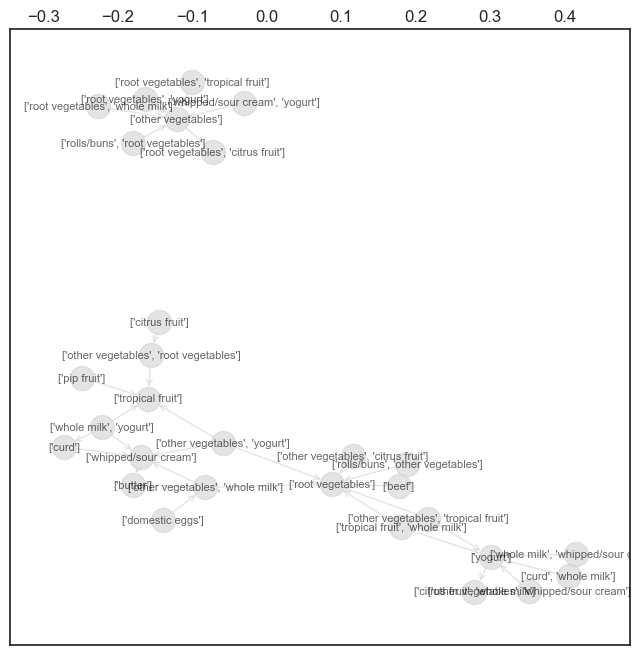

In [124]:
nx.draw_networkx(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules['support'].iloc[:47]
                )

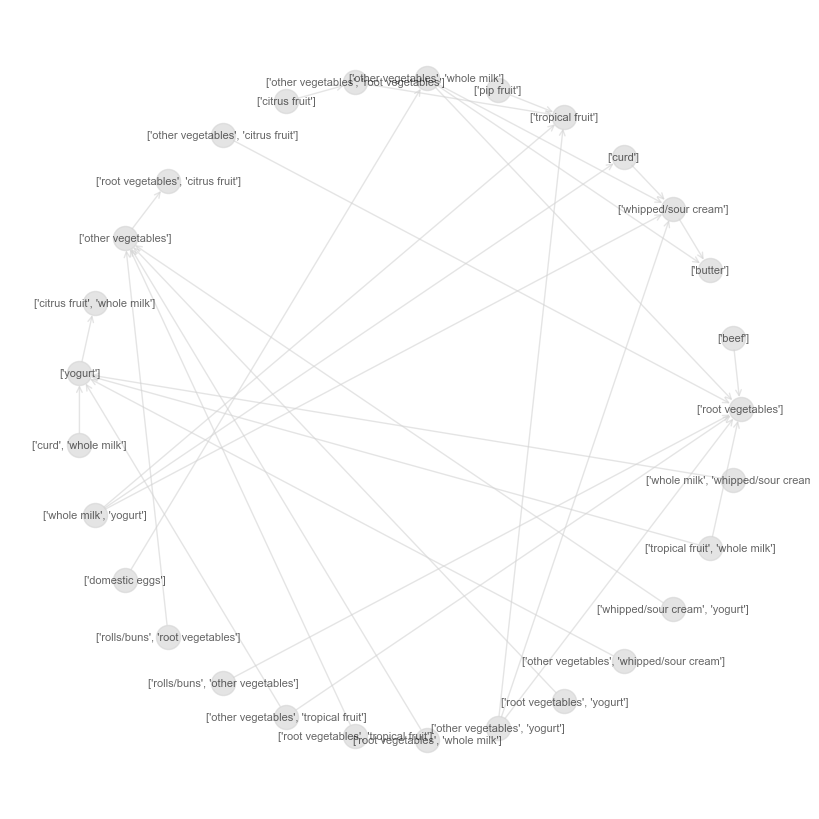

In [125]:
nx.draw_circular(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey'
                 # node_color=rules.sort_values(['support'])['support'].iloc[:47]
                )

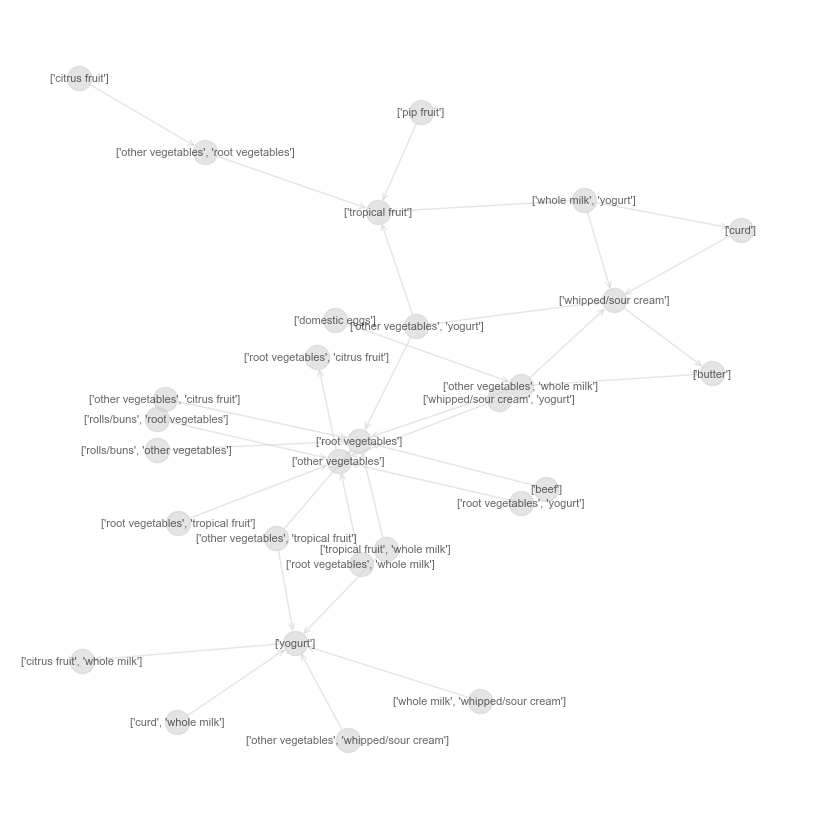

In [126]:
plt.rcParams['figure.figsize']=8,8
nx.draw_kamada_kawai(G,
                 arrows=True,
                 arrowstyle='<-',
                 with_labels=True,
                 cmap='cividis',
                 alpha=0.6,
                 edge_color='lightgray',
                 font_size=8,
                 node_color='lightgrey',
                )

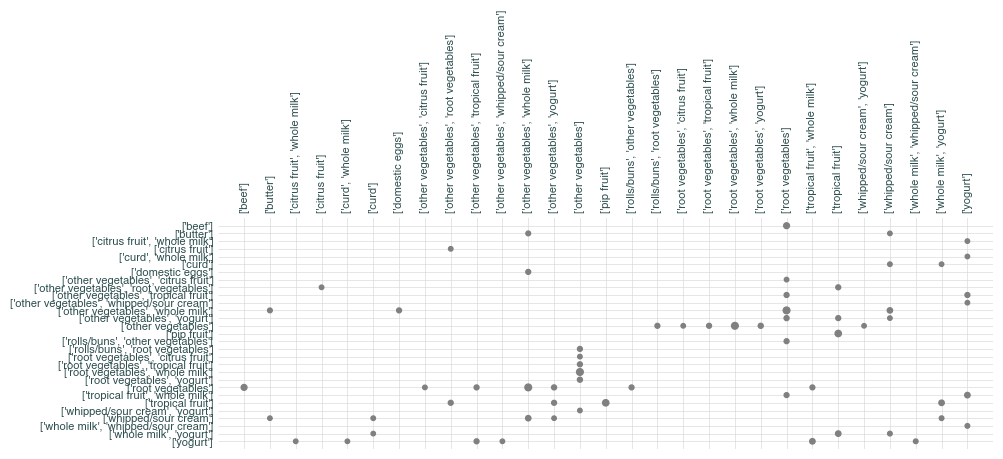

In [127]:
kcolors=['#F73972','#F2B3C6','#144962']
# create the plot
catscatter(rules,'antecedent','consequent','support',color=kcolors, ratio=1000)
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: str(list(antecedent)))
rules['consequent'] = rules['consequents'].apply(lambda consequent: str(list(consequent)))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Conclusion

Dairy products (such as whole milk, yogurt, curd, butter, and cream) are often associated with vegetable and fruit products (such as other vegetables, frozen vegetables, root vegetables, citrus fruit, and tropical fruit). It seems that it makes sense to put the dairy products close to the vegetables and fruits if it is the intent of the store owner only to sell those items. In practice however, these items are usually put at opposite ends of a store to encourage more browsing in between within the isles that could lead to more purchases.

So naturally the items associated with other vegetables (such as fruits and vegetables) will be grouped together, as will the dairy products with each other. Special price offerings can be offered when these items are purchased together. As seen in a figure in section 5.1 there is a cluster of meat and bread products that lead to the purchase of both vegetables and dairy. This could be stationed far away from the other products as well to encourage browsing. The owner of the store can offer deals on purchasing dairy and vegetable products together to encourage the browsing through the other isles (it makes them move from one end of the store to another). This would likely lead to more purchases of unrelated products.